#### Resumo 

O objetivo deste código é realizar um case de análise de dados, por meio do setor de energia solar. Em Turbinas Eólicas, os Sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, potência gerada etc. por intervalos de 10 minutos. Este arquivo foi retirado do sistema Scada de uma turbina eólica que está funcionando e gerando energia na Turquia.

##### Os dados

In [19]:
#Data/Hora (para intervalos de 10 minutos)
#LV ActivePower (kW): A potência gerada pela turbina naquele momento
#Velocidade do vento (m/s): A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade)
#Theoretical_Power_Curve (KWh): Os valores de potência teórica que a turbina gera com aquela velocidade do vento que é fornecida pelo fabricante da turbina
#Direção do vento (°): A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para esta direção automaticamente)

#### Importando Bibliotecas

In [23]:
pip install --upgrade pandas

In [24]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

#### Ler o arquivo

In [35]:
#para ler o arquivo eu crio uma variável e peço para variável ler a planilha com "pd.read_csv("caminho da planilha")
turbina = pd.read_csv("C://Users//guilh//anaconda3//Projetos Meus//Energia//Energia_planilha.csv")


#################
#alterando o nome das colunas da planilha, para isso eu crio uma variável em que eu coloco "columns" faço ela para uma lista, como são sei colunas eu coloco 6 itens de nome na lista
turbina.columns = ['Data/hora','Active Power (KW)','Velocidade do Vento','Curva teórica (KW)','Direção do Vento']

#alterando a coluna 'Data/hora' para o formato datetime, para isso eu crio a variavél com o nome da coluna, peço para substituir para datetime e peço para colocar na próprio coluna 'Data/hora'
#Use `format='mistoformat='mixed': se suas strings de data e hora tiverem formatos inconsistentes, tente usar format='mixed'para inferir o formato de cada elemento individualmente.dayfirstparâmetro em conjunto com esta opção. Por exemplo:
# esse formato permite que você trabalhe individualmente cada elemento de tempo e não com o valor geral
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format='mixed', dayfirst=True)

#deletando a coluna 'Direção do Vento'
del turbina['Direção do Vento']


#################


#para ler o ducumento eu uso o "display"
display(turbina)

,Data/hora,Active Power (KW),Velocidade do Vento,Curva teórica (KW)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


#### Plotando o Gráfico - Performance Real

<AxesSubplot:xlabel='Velocidade do Vento', ylabel='Active Power (KW)'>

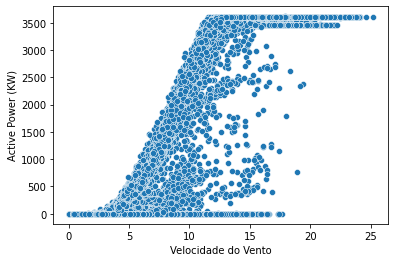

In [37]:
#criando o gráfico de disperção, para isso coloco que os meus dados, são os dados presente na variável turbina, logo data = turbina e depois eu defino o meu eixo x e meu eixo y
sns.scatterplot(data = turbina, x = 'Velocidade do Vento', y = 'Active Power (KW)')
#Interpretação: a cada ponto do meu gráfico significa que para aquea velocidade de vento, quanto de potência ele gerou naquele momento

#### Plotando o Gráfico - Performance Teórica

<AxesSubplot:xlabel='Velocidade do Vento', ylabel='Curva teórica (KW)'>

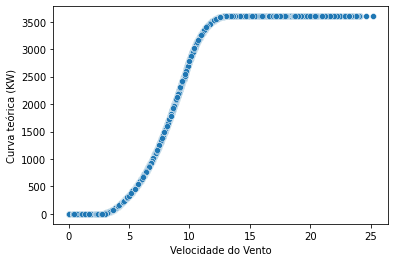

In [38]:
# o mesmpo processo do anterior, só irei alterar o meu eixo y
sns.scatterplot(data = turbina, x = 'Velocidade do Vento', y = 'Curva teórica (KW)')
# interpretação: este dado se refere a como seria a performance perfeita da turbina

#### Criando Limites Aceitáveis  

In [57]:
#Criando o que seria um limite aceitável para o mundo real e o teórico, com base no próprio modelo teórico
# 5% de variação para cima para baixo com base no modelo teórico  

# transformando as colunas active power e curva teorica em listas, para isso eu crio um variável, chamo a coluna e uso o 'tolist()'
pot_real = turbina ['Active Power (KW)'].tolist()
pot_teorica = turbina ['Curva teórica (KW)'].tolist()

#criando uma lista que será a potência máxima (potência teorica + 5%) e potência mínima (potência teorica - 5%), logo de início serão listas vazias
pot_max = []
pot_min = []

#lista que irá ver os valores que estão dentro do limite dos 5% para baixo ou cima
dentro_limite = []

#será preciso percorrer lista, para isso é bacana usar o 'for'
#criando a lista de potência máxima com +5%, logo multiplico por 1,05, na potência mínima eu multiplico por 0,95, igual abaixo

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
    

# vendo se o tamanho estão certos
#print(len(pot_max), len(pot_min), len(pot_teorica))


# foi dividido os pontos em 3 tipos, sendo aqueles que estão dentro do intervalo de 5% para baixo ou cima, os que estão zerado e os que estão fora dos 5%, desenho no paint está na pasta do projeto, mostrando os tipos
# o p significa para cada índice, por isso usamos o p e potência, o p é o indice e potencia é o valor real
for p, potencia in enumerate (pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia ==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        

#### Vendo a relação do grupo para o total

In [72]:
# para deixar um valor com duas casas decimais você deixa "round(variável, 2)"
den = round((dentro_limite.count('Dentro')/len(dentro_limite)*100),2)
fora = round((dentro_limite.count('Fora')/len(dentro_limite)*100),2)
zer = round((dentro_limite.count('Zero')/len(dentro_limite)*100),2)

In [73]:
print("{}% estão dentro da margem do sensor". format(den))
print("{}% estão fora da margem do sensor". format(fora))
print("{}% não fora capturados pelo sensor". format(zer))

37.29% estão dentro da margem do sensor
55.79% estão fora da margem do sensor
6.92% não fora capturados pelo sensor


#### Adicionando lista "dentro_limite" ao dataframe:

In [50]:
# colocando a nova lista dentro do dataframe:
# estou criando uma coluna chamada dentro limite que irá receber os valores da lista dentro_limite
turbina ["Dentro Limite"] = dentro_limite
display(turbina)

,Data/hora,Active Power (KW),Velocidade do Vento,Curva teórica (KW),Dentro Limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


#### Plotando o Gráfico com a nova coluna 

<AxesSubplot:xlabel='Velocidade do Vento', ylabel='Active Power (KW)'>

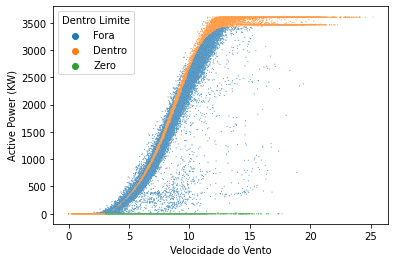

In [53]:
sns.scatterplot(data = turbina, x = 'Velocidade do Vento', y = 'Active Power (KW)', hue = 'Dentro Limite', s = 1)